# Scatterplots of active region statistics: Cycle 21

### Preamble

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcol
import matplotlib.cm as cm
import itertools
import pandas as pd
from scipy import stats
%matplotlib inline 

# Font Size

font = {'family': 'sans-serif',
        'weight': 'normal',
        'size'   : 17}

plt.rc('font', **font)


A = np.fromfile('axcollect_c21_threecycles.dat',dtype=np.float32)
A = A.reshape(844,132)

N = np.fromfile('npole_correct_c21.dat',dtype=np.float32)
N = N.reshape(844,132)

S = np.fromfile('spole_correct_c21.dat',dtype=np.float32)
S = S.reshape(844,132)

axdipole2 = np.fromfile('axdipole2_c21_threecycles.dat',dtype=np.float32)

start = []
start_npole = []
start_spole = []
begin = []
begin_npole = []
begin_spole = []

for i in range(844):
    index = np.nonzero(A[i,:])
    start.append(index[0][0])
    begin.append(A[i,start[i]])
    #index_npole = np.nonzero(A[i,:]);
    #start_npole.append(index_npole[0][0]);
    #begin_npole.append(N[i,start_npole[i]]);
    #index_spole = np.nonzero(S[i,:]);
    #start_spole.append(index_spole[0][0]);
    #begin_spole.append(S[i,start_spole[i]]);
    
start = np.asarray(start)
#start_npole = np.asarray(start_npole)
#start_spole = np.asarray(start_spole)
begin = np.asarray(begin)
#begin_npole = np.asarray(begin_npole)
#begin_spole = np.asarray(begin_spole)

final = A[:,131]
final[0] = 1e-7
begin[0] = 1e-7
begin_rel = begin/(axdipole2[131]-axdipole2[0])
final_rel = final/(axdipole2[131]-axdipole2[0])
#final_npole = N[:,131]
#final_spole = S[:,131]

total = []
#total_npole = []
#total_spole = []
for i in range(132):
    total.append(sum(A[:,i]))
    #total_npole.append(sum(N[:,i]))
    #total_spole.append(sum(S[:,i]))

thresh = 2.4e-2;
strong = np.asarray(np.where(abs(final)>thresh))
weak = np.asarray(np.where(abs(final)<thresh))
reg_percent = strong.size/844*100;
#print(reg_percent)

thresh_npole = 2.4e-2;
#strong_npole = np.asarray(np.where(abs(final_npole)>thresh_npole))
#weak_npole = np.asarray(np.where(abs(final_npole)<thresh_npole))
#reg_percent_npole = strong_npole.size/844*100;
#print(reg_percent_npole)

thresh_spole = 2.4e-2;
#strong_spole = np.asarray(np.where(abs(final_spole)>thresh_spole))
#weak_spole = np.asarray(np.where(abs(final_spole)<thresh_spole))
#reg_percent_spole = strong_spole.size/844*100;
#print(reg_percent_spole)

initflux = np.fromfile('initflux_c21_threecycles.dat',dtype=np.float32)
initflux2 = np.fromfile('initflux2_c21_threecycles.dat',dtype=np.float32)
reg_lat = np.fromfile('reg_lat_c21_threecycles.dat',dtype=np.float32)

a = [(initflux),(initflux2),(reg_lat),(start),(final_rel),(begin),(begin),(begin_rel),(final)]
a = np.asarray(a)
a = np.transpose(a)
b = sorted(a, key=lambda column: np.abs(column[4]))
b = np.transpose(b)

c = sorted(a, key=lambda column: np.abs(column[1]))
c = np.transpose(c)

d = sorted(a, key=lambda column: np.abs(column[2]))
d = np.transpose(d)

### Plots

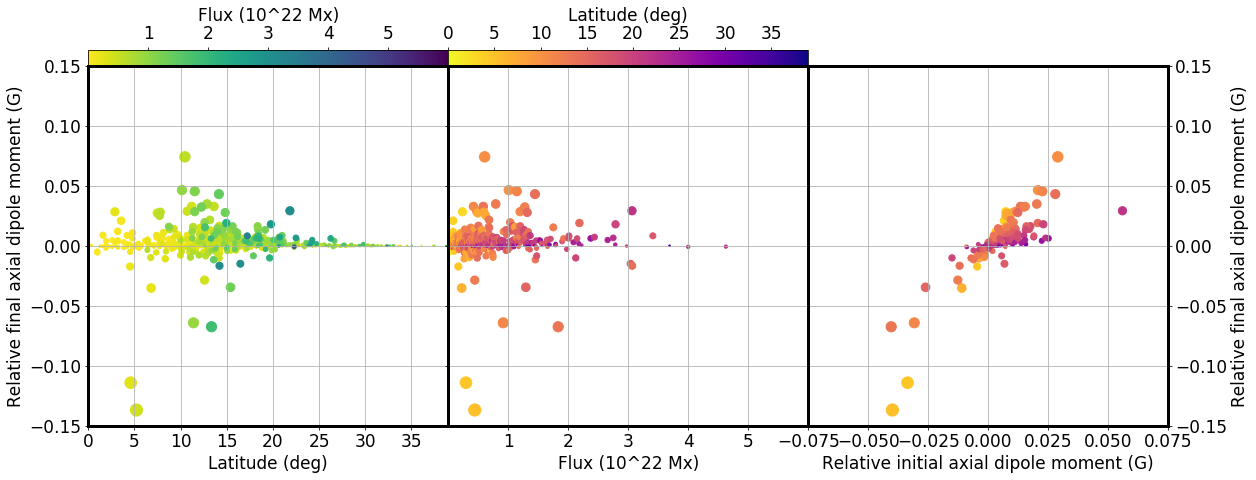

In [2]:
dpi = 300
pxx = 1500  # Horizontal size of each panel
pxy = 1500    # Vertical size of each panel

nph = 1      # Number of horizontal panels
npv = 3      # Number of vertical panels

# Padding
padv  = 200 #Vertical padding in pixels at the edge of figure
padv2 = 0 #Vertical padding in pixels between panels
padh  = 450 #Horizontal padding in pixels at the edge of the figure
padh2 = 0 #Horizontal padding in pixels between panels

# Figure sizes in pixels
fszv = (npv*pxy + 2*padv + (npv-1)*padv2 )      #Vertical size of figure in inches
fszh = (nph*pxx + 2*padh + (nph-1)*padh2 )      #Horizontal size of figure in inches

# Conversion to relative units
ppadv  = padv/fszv     #Vertical padding in relative units
ppadv2 = padv2/fszv    #Vertical padding in relative units
ppadh  = padh/fszv     #Horizontal padding the edge of the figure in relative units
ppadh2 = padh2/fszv    #Horizontal padding between panels in relative units

## Start Figure
fig = plt.figure(figsize=(fszh/dpi,fszv/dpi))

# Latitude Limits
lat1 = 0
lat2 = 39

latticks = np.arange(lat1,lat2,5)

# Flux Limits
fl1 = 0
fl2 = 6

fluxticks = np.arange(1,fl2,1)

#Size Factor
szf = 400


# Add colorbar axes
cbaxes1 = fig.add_axes([ppadh, ppadv+pxy/fszv, pxx/fszh, ppadv/3])
cbaxes2 = fig.add_axes([ppadh+pxx/fszh, ppadv+pxy/fszv, pxx/fszh, ppadv/3])

# Latitude vs. Final Dipole
ax1 = fig.add_axes([ppadh, ppadv, pxx/fszh, pxy/fszv])
im1 = ax1.scatter(abs(c[2]),c[4],szf*np.sqrt(abs(c[4])),abs(c[1])/1e22,cmap='viridis_r',vmin=fl1,vmax=fl2)
ax1.set_xlabel('Latitude (deg)')
ax1.set_xlim(lat1,lat2)
#ax1.set_title('Coloured by flux, sized by RFADM')
ax1.set_ylabel('Relative final axial dipole moment (G)')
ax1.grid()
ax1.set_xticks(latticks)

# Flux vs. Final Dipole
ax2 = fig.add_axes([ppadh+pxx/fszh, ppadv, pxx/fszh, pxy/fszv], sharey=ax1)
ax2.scatter(abs(c[1])/1e22,c[4],szf*np.sqrt(abs(c[4])),abs(c[2]),cmap='plasma_r',vmin=lat1,vmax=lat2)
ax2.set_xlabel('Flux (10^22 Mx)')
ax2.set_xlim(fl1,fl2)

#ax2.set_title('Coloured by time, sized by RFADM')
ax2.grid()
ax2.tick_params(labelleft='off') 
ax2.set_xticks(fluxticks)

# Initial Dipole vs. Final Dipole
ax3 = fig.add_axes([ppadh+pxx/fszh*2, ppadv, pxx/fszh, pxy/fszv], sharey=ax1)

im3 = ax3.scatter(c[7],c[4],szf*np.sqrt(abs(c[4])),abs(c[2]),cmap='plasma_r',vmin=lat1,vmax=lat2)
ax3.set_xlabel('Relative initial axial dipole moment (G)')
#ax3.set_title('Coloured by flux, sized by RFADM')
ax3.set_xlim(-0.075,0.075)
ax3.grid()
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position('right')
ax3.set_ylabel('Relative final axial dipole moment (G)')

# Setting Vertical Axis
ax1.set_ylim(-0.15,0.15)




# Adding Flux Colorbar

cb1 = fig.colorbar(im1,cax=cbaxes1, orientation='horizontal')
cb1.set_label('Flux (10^22 Mx)')
cb1.set_ticks(ax2.get_xticks())
cbaxes1.xaxis.tick_top()
cbaxes1.xaxis.set_label_position('top')


# Adding Latitude Colorbar

cb2 = fig.colorbar(im3,cax=cbaxes2, orientation='horizontal')
cb2.set_label('Latitude (deg)')
cb2.set_ticks(latticks)
cbaxes2.xaxis.tick_top()
cbaxes2.xaxis.set_label_position('top')




# Making Spines Bolder

ax1.spines['bottom'].set_linewidth(3) 
ax1.spines['top'].set_linewidth(3)  
ax1.spines['right'].set_linewidth(3) 
ax1.spines['left'].set_linewidth(3) 

ax2.spines['bottom'].set_linewidth(3) 
ax2.spines['top'].set_linewidth(3)  
ax2.spines['right'].set_linewidth(3) 
ax2.spines['left'].set_linewidth(3) 

ax3.spines['bottom'].set_linewidth(3) 
ax3.spines['top'].set_linewidth(3)  
ax3.spines['right'].set_linewidth(3) 
ax3.spines['left'].set_linewidth(3) 


#plt.savefig('/home/grads/xsxs53/Documents/phd/Papers/regions_axd/c21_3panel.eps', format='eps', dpi=300,bbox_inches='tight')


3.27046721442 -0.000538743762155 0.98440299649 3.02592412024e-27 0.100238125439


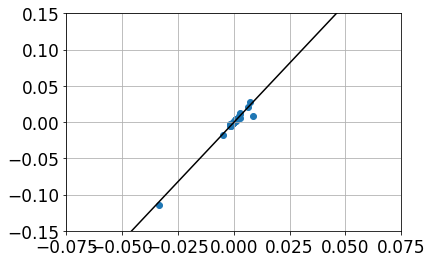

3.27210397721 -0.000491705290341 0.994056585572 2.23631320126e-91 0.0371587640895


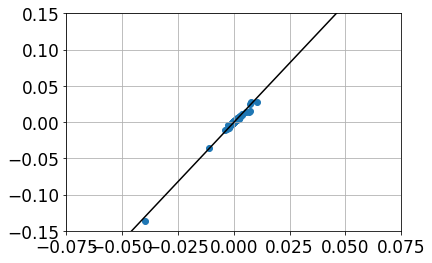

1.85189640882 8.13368230379e-05 0.964237624812 1.87516968217e-118 0.0358151786168


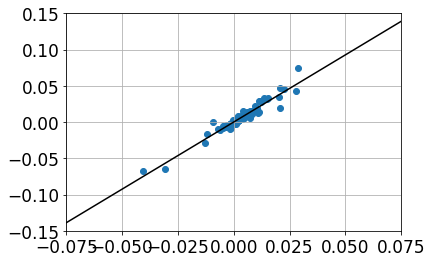

0.855552465688 -0.000262149644217 0.853135364375 8.77262679633e-68 0.0342738530229


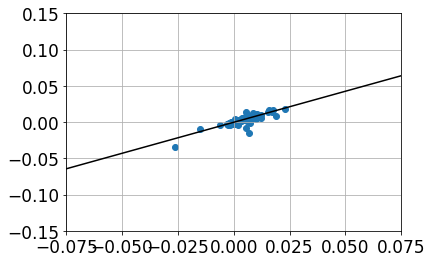

0.445224480456 -0.000143766481907 0.945023973563 2.68065488501e-71 0.0128830099967


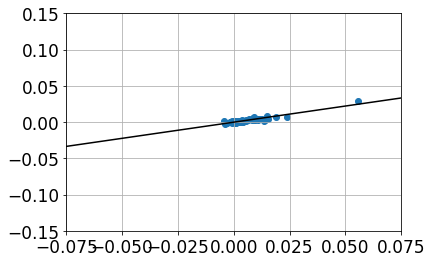

0.172959575951 -7.35976881639e-05 0.923133809978 3.94503889258e-39 0.00759330997207


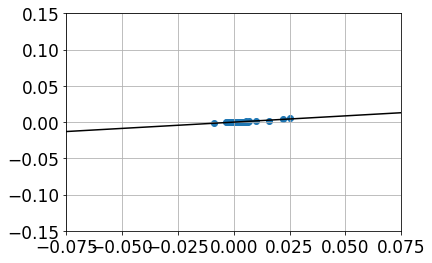

0.0415376963778 -1.49734728579e-05 0.789649092275 2.13136229244e-07 0.00609937575121


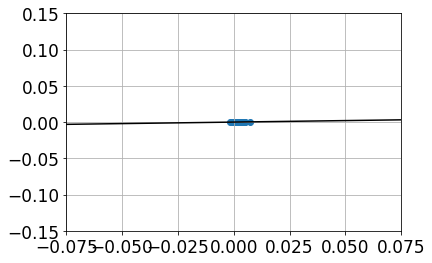

0.00657321446702 -1.39495210029e-06 0.95339627481 0.00087816394108 0.000930303904051


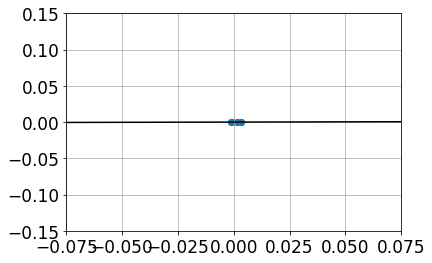

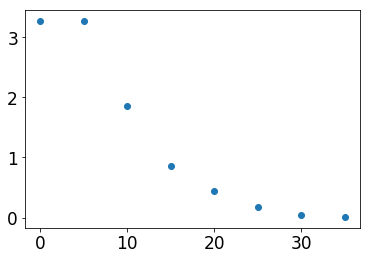

In [3]:
slope,intercept,rvalue,pvalue,stderr = stats.linregress(begin_rel[np.abs(reg_lat)<5],final_rel[np.abs(reg_lat)<5])
initials = np.linspace(-0.075,0.075,1000)

print(slope,intercept,rvalue,pvalue,stderr)

plt.scatter(begin_rel[np.abs(reg_lat)<5],final_rel[np.abs(reg_lat)<5])
plt.plot(initials,initials*slope + intercept,color="black")
plt.xlim(-0.075,0.075)
plt.ylim(-0.15,0.15)
plt.grid()
plt.show()



slope,intercept,rvalue,pvalue,stderr = stats.linregress(begin_rel[(np.abs(reg_lat)>=5) & (np.abs(reg_lat)<10)],final_rel[(np.abs(reg_lat)>=5) & (np.abs(reg_lat)<10)])
initials = np.linspace(-0.075,0.075,1000)

print(slope,intercept,rvalue,pvalue,stderr)

plt.scatter(begin_rel[(np.abs(reg_lat)>=5) & (np.abs(reg_lat)<10)],final_rel[(np.abs(reg_lat)>=5) & (np.abs(reg_lat)<10)])
plt.plot(initials,initials*slope + intercept,color="black")
plt.xlim(-0.075,0.075)
plt.ylim(-0.15,0.15)
plt.grid()
plt.show()



slope,intercept,rvalue,pvalue,stderr = stats.linregress(begin_rel[(np.abs(reg_lat)>=10) & (np.abs(reg_lat)<15)],final_rel[(np.abs(reg_lat)>=10) & (np.abs(reg_lat)<15)])
initials = np.linspace(-0.075,0.075,1000)

print(slope,intercept,rvalue,pvalue,stderr)

plt.scatter(begin_rel[(np.abs(reg_lat)>=10) & (np.abs(reg_lat)<15)],final_rel[(np.abs(reg_lat)>=10) & (np.abs(reg_lat)<15)])
plt.plot(initials,initials*slope + intercept,color="black")
plt.xlim(-0.075,0.075)
plt.ylim(-0.15,0.15)
plt.grid()
plt.show()



slope,intercept,rvalue,pvalue,stderr = stats.linregress(begin_rel[(np.abs(reg_lat)>=15) & (np.abs(reg_lat)<20)],final_rel[(np.abs(reg_lat)>=15) & (np.abs(reg_lat)<20)])
initials = np.linspace(-0.075,0.075,1000)

print(slope,intercept,rvalue,pvalue,stderr)

plt.scatter(begin_rel[(np.abs(reg_lat)>=15) & (np.abs(reg_lat)<20)],final_rel[(np.abs(reg_lat)>=15) & (np.abs(reg_lat)<20)])
plt.plot(initials,initials*slope + intercept,color="black")
plt.xlim(-0.075,0.075)
plt.ylim(-0.15,0.15)
plt.grid()
plt.show()



slope,intercept,rvalue,pvalue,stderr = stats.linregress(begin_rel[(np.abs(reg_lat)>=20) & (np.abs(reg_lat)<25)],final_rel[(np.abs(reg_lat)>=20) & (np.abs(reg_lat)<25)])
initials = np.linspace(-0.075,0.075,1000)

print(slope,intercept,rvalue,pvalue,stderr)

plt.scatter(begin_rel[(np.abs(reg_lat)>=20) & (np.abs(reg_lat)<25)],final_rel[(np.abs(reg_lat)>=20) & (np.abs(reg_lat)<25)])
plt.plot(initials,initials*slope + intercept,color="black")
plt.xlim(-0.075,0.075)
plt.ylim(-0.15,0.15)
plt.grid()
plt.show()



slope,intercept,rvalue,pvalue,stderr = stats.linregress(begin_rel[(np.abs(reg_lat)>=25) & (np.abs(reg_lat)<30)],final_rel[(np.abs(reg_lat)>=25) & (np.abs(reg_lat)<30)])
initials = np.linspace(-0.075,0.075,1000)

print(slope,intercept,rvalue,pvalue,stderr)

plt.scatter(begin_rel[(np.abs(reg_lat)>=25) & (np.abs(reg_lat)<30)],final_rel[(np.abs(reg_lat)>=25) & (np.abs(reg_lat)<30)])
plt.plot(initials,initials*slope + intercept,color="black")
plt.xlim(-0.075,0.075)
plt.ylim(-0.15,0.15)
plt.grid()
plt.show()



slope,intercept,rvalue,pvalue,stderr = stats.linregress(begin_rel[(np.abs(reg_lat)>=30) & (np.abs(reg_lat)<35)],final_rel[(np.abs(reg_lat)>=30) & (np.abs(reg_lat)<35)])
initials = np.linspace(-0.075,0.075,1000)

print(slope,intercept,rvalue,pvalue,stderr)

plt.scatter(begin_rel[(np.abs(reg_lat)>=30) & (np.abs(reg_lat)<35)],final_rel[(np.abs(reg_lat)>=30) & (np.abs(reg_lat)<35)])
plt.plot(initials,initials*slope + intercept,color="black")
plt.xlim(-0.075,0.075)
plt.ylim(-0.15,0.15)
plt.grid()
plt.show()



slope,intercept,rvalue,pvalue,stderr = stats.linregress(begin_rel[np.abs(reg_lat)>=35],final_rel[np.abs(reg_lat)>=35])
initials = np.linspace(-0.075,0.075,1000)

print(slope,intercept,rvalue,pvalue,stderr)

plt.scatter(begin_rel[np.abs(reg_lat)>=35],final_rel[np.abs(reg_lat)>=35])
plt.plot(initials,initials*slope + intercept,color="black")
plt.xlim(-0.075,0.075)
plt.ylim(-0.15,0.15)
plt.grid()
plt.show()


slopes = np.array([3.270,3.272,1.852,0.856,0.445,0.173,0.042,0.007])
ranges = np.arange(0,40,5)
plt.scatter(ranges,slopes)
plt.show()

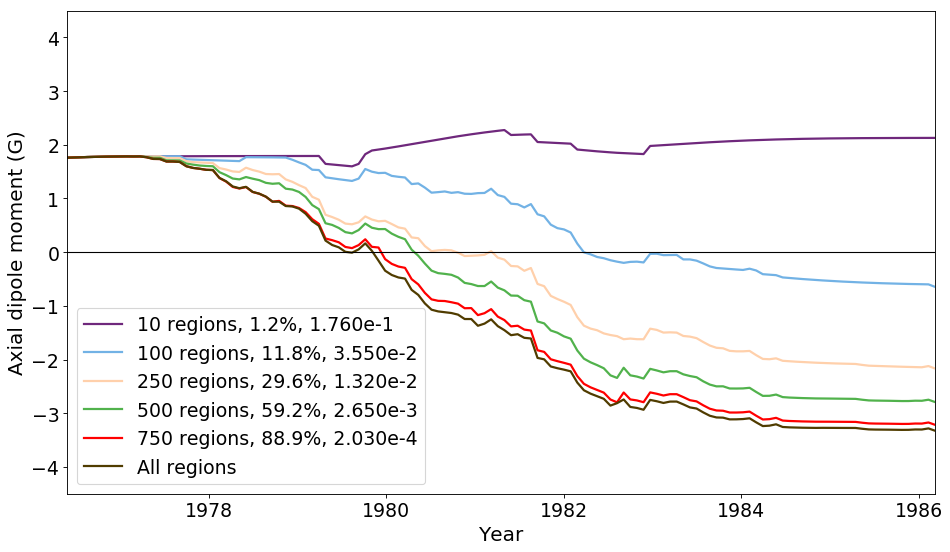

In [8]:
brown = (80/255,60/255,0)
green = (81/255,178/255,76/255)
blue = (114/255,178/255,229/255)
purple = (111/255,40/255,124/255)
peach = (1,208/255,171/255)

timeyear = (np.arange(1,133)*27.27+121)/365.25+1976

axdipole_10 = np.fromfile('axdipole_10_c21_threecycles.dat',dtype=np.float32)
axdipole_100 = np.fromfile('axdipole_100_c21_threecycles.dat',dtype=np.float32)
axdipole_250 = np.fromfile('axdipole_250_c21_threecycles.dat',dtype=np.float32)
axdipole_500 = np.fromfile('axdipole_500_c21_threecycles.dat',dtype=np.float32)
axdipole_750 = np.fromfile('axdipole_750_c21_threecycles.dat',dtype=np.float32)

fig2 = plt.figure(figsize=(14,8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(timeyear,axdipole_10,color=purple,lw=2,label='10 regions, 1.2%, 1.760e-1')
plt.plot(timeyear,axdipole_100,color=blue,lw=2,label='100 regions, 11.8%, 3.550e-2')
plt.plot(timeyear,axdipole_250,color=peach,lw=2,label='250 regions, 29.6%, 1.320e-2')
plt.plot(timeyear,axdipole_500,color=green,lw=2,label='500 regions, 59.2%, 2.650e-3')
plt.plot(timeyear,axdipole_750,'red',lw=2,label='750 regions, 88.9%, 2.030e-4')
plt.plot(timeyear,axdipole2,color=brown,lw=2,label='All regions')
plt.plot((timeyear[0],timeyear[131]), (0, 0), 'k-',lw=1)
plt.xlim(timeyear[0],timeyear[131])
plt.ylim(-4.5,4.5)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Axial dipole moment (G)',fontsize=18)
plt.legend()
plt.show()

#plt.savefig('/home/grads/xsxs53/Documents/phd/Papers/regions_axd/c21_5profiles.eps', format='eps', dpi=300,bbox_inches='tight')


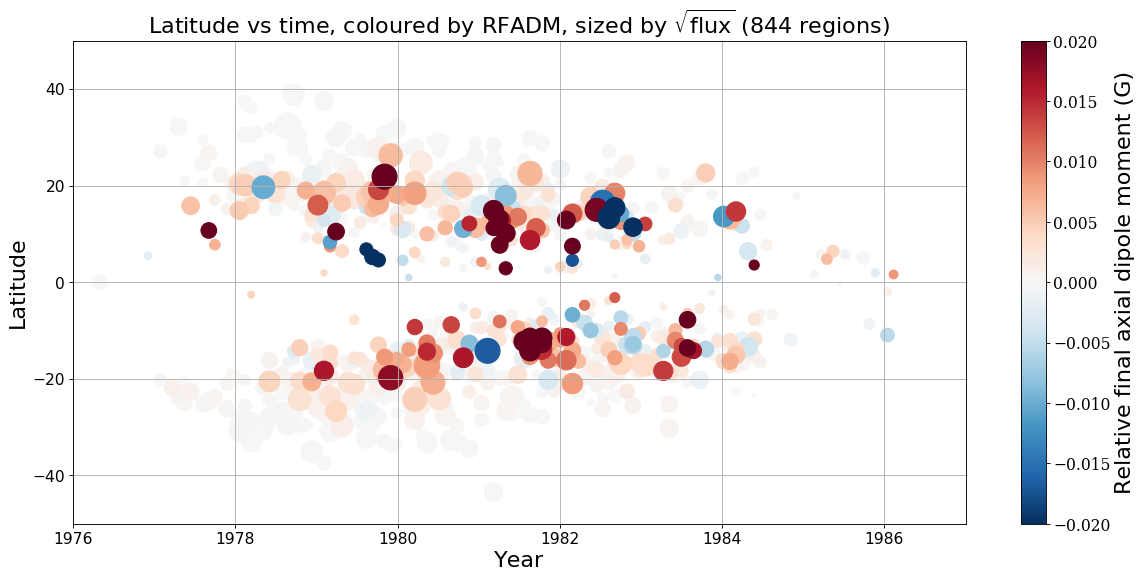

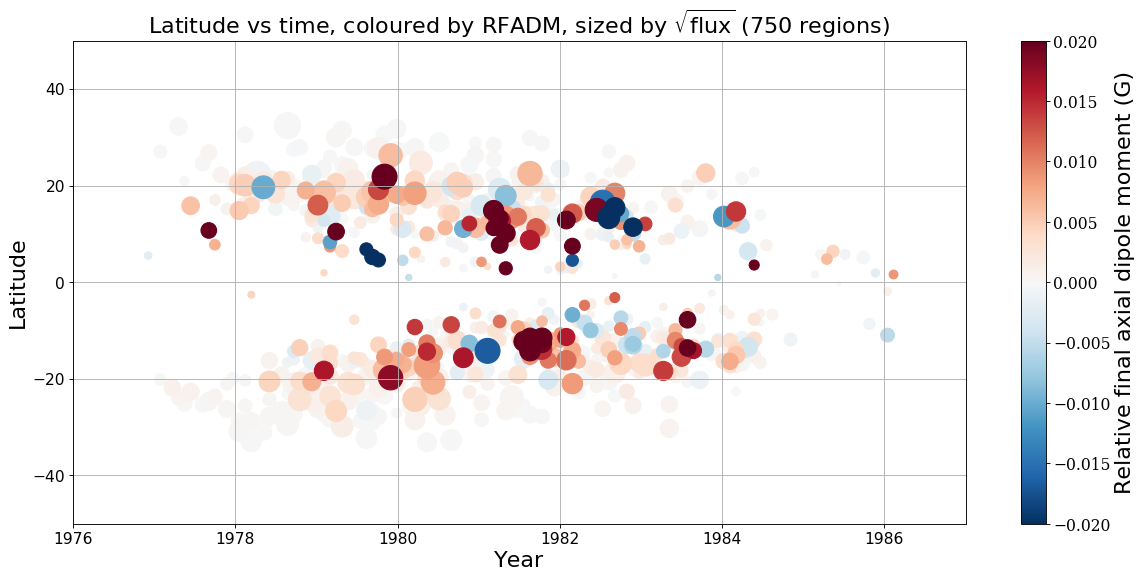

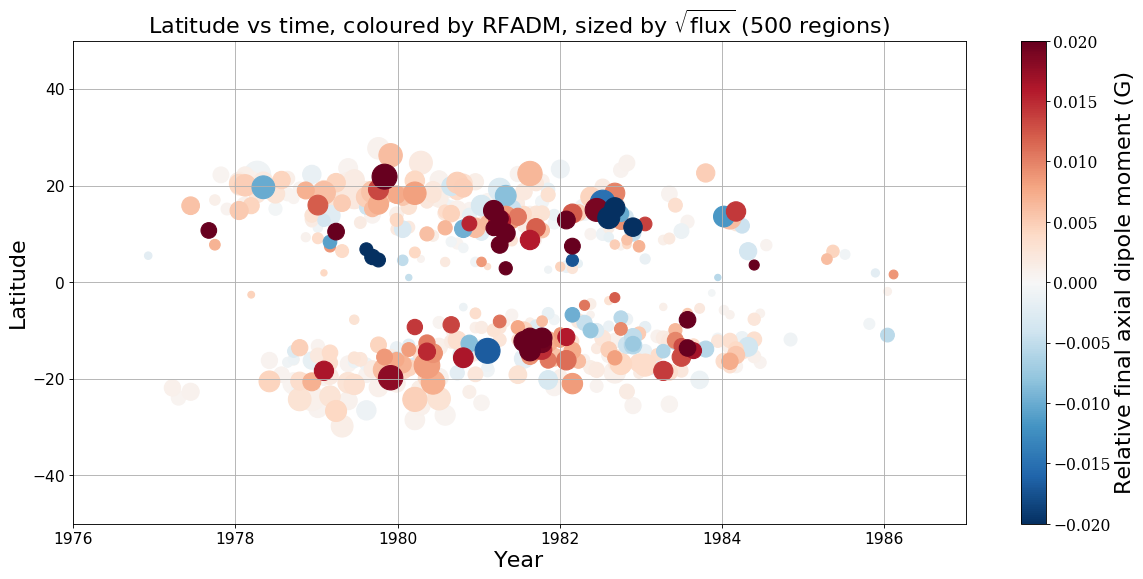

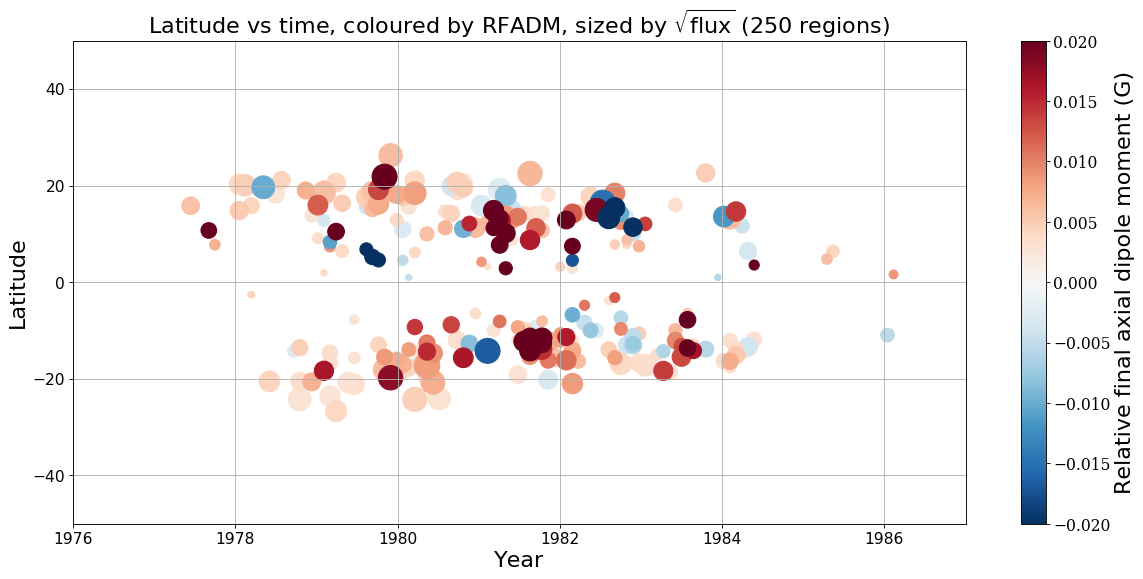

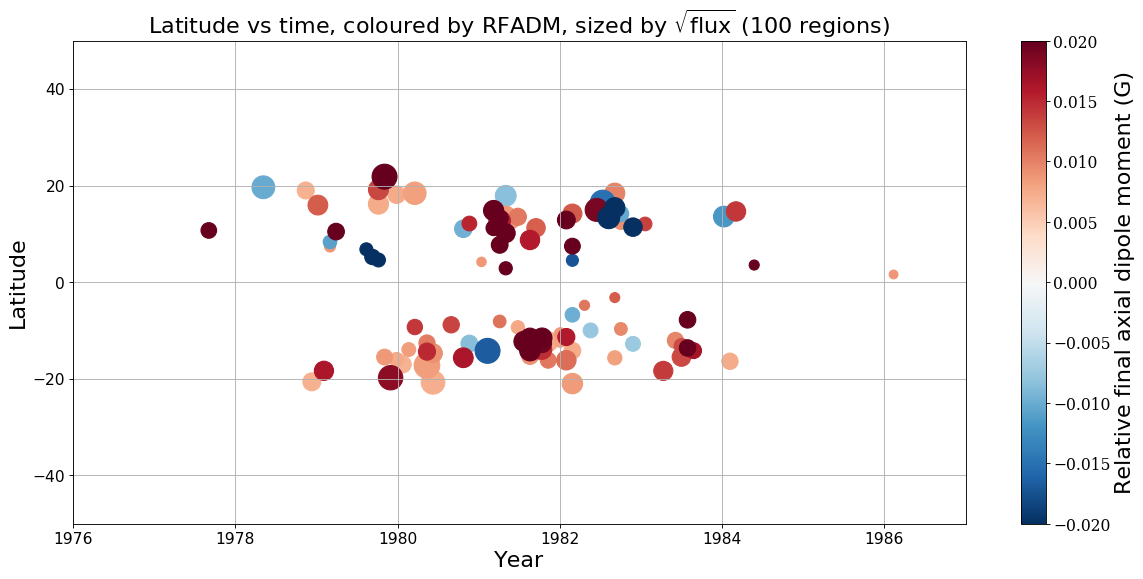

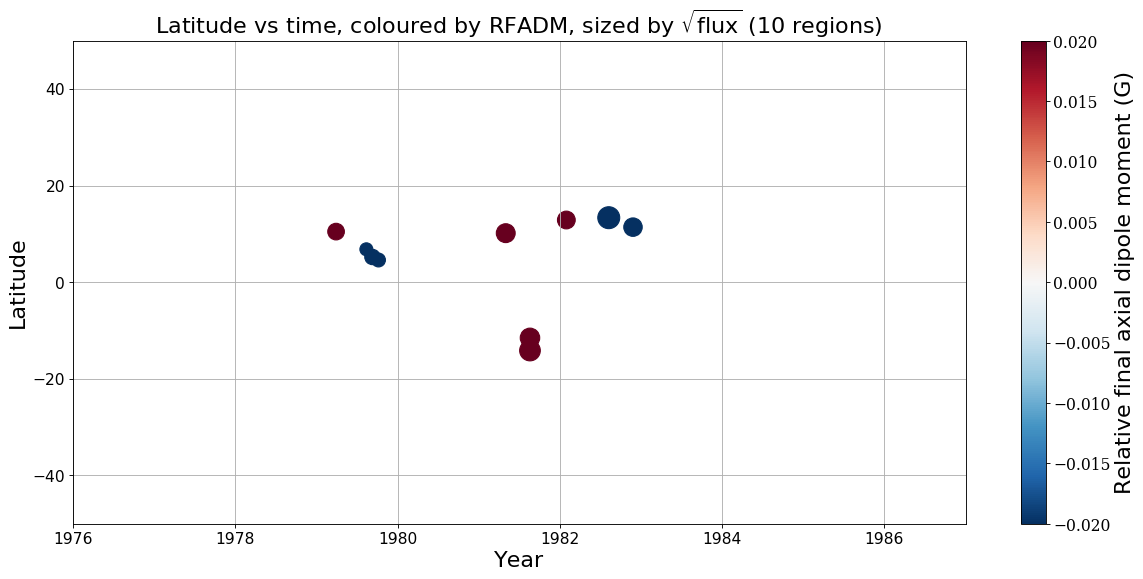

In [5]:
fig2 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter((b[3]*27.27+121)/365.25+1976,b[2],200*np.sqrt(abs(b[0])),b[4],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
cb_label = 'Relative final axial dipole moment (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(1976,1987)
plot = fig2.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Latitude vs time, coloured by RFADM, sized by $\sqrt{\mathrm{flux}}$ (844 regions)',fontsize=20)
plt.grid()
plt.show()


thresh = 2.03e-4;
strong2 = np.asarray(np.where(abs(b[8])>thresh))
weak = np.asarray(np.where(abs(b[8])<thresh))
reg_percent = strong2.size/844*100;
#print(strong2.size)

fig = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter((b[3][strong2]*27.27+121)/365.25+1976,b[2][strong2],200*np.sqrt(abs(b[0][strong2])),b[4][strong2],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
cb_label = 'Relative final axial dipole moment (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(1976,1987)
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Latitude vs time, coloured by RFADM, sized by $\sqrt{\mathrm{flux}}$ (750 regions)',fontsize=20)
plt.grid()
plt.show()

        
thresh = 2.65e-3;
strong3 = np.asarray(np.where(abs(b[8])>thresh))
weak = np.asarray(np.where(abs(b[8])<thresh))
reg_percent = strong3.size/844*100;
#print(strong3.size)

fig = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter((b[3][strong3]*27.27+121)/365.25+1976,b[2][strong3],200*np.sqrt(abs(b[0][strong3])),b[4][strong3],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
cb_label = 'Relative final axial dipole moment (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(1976,1987)
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Latitude vs time, coloured by RFADM, sized by $\sqrt{\mathrm{flux}}$ (500 regions)',fontsize=20)
plt.grid()
plt.show()


thresh = 1.32e-2;
strong4 = np.asarray(np.where(abs(b[8])>thresh))
weak = np.asarray(np.where(abs(b[8])<thresh))
reg_percent = strong4.size/844*100;
#print(strong4.size)

fig = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter((b[3][strong4]*27.27+121)/365.25+1976,b[2][strong4],200*np.sqrt(abs(b[0][strong4])),b[4][strong4],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
cb_label = 'Relative final axial dipole moment (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(1976,1987)
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Latitude vs time, coloured by RFADM, sized by $\sqrt{\mathrm{flux}}$ (250 regions)',fontsize=20)
plt.grid()
plt.show()


thresh = 3.55e-2;
strong5 = np.asarray(np.where(abs(b[8])>thresh))
weak = np.asarray(np.where(abs(b[8])<thresh))
reg_percent = strong5.size/844*100;
#print(strong5.size)

fig6 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter((b[3][strong5]*27.27+121)/365.25+1976,b[2][strong5],200*np.sqrt(abs(b[0][strong5])),b[4][strong5],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
cb_label = 'Relative final axial dipole moment (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(1976,1987)
plot = fig6.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Latitude vs time, coloured by RFADM, sized by $\sqrt{\mathrm{flux}}$ (100 regions)',fontsize=20)
plt.grid()
plt.show()


thresh = 1.76e-1;
strong6 = np.asarray(np.where(abs(b[8])>thresh))
weak = np.asarray(np.where(abs(b[8])<thresh))
reg_percent = strong6.size/844*100;
#print(strong6.size)

fig6 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter((b[3][strong6]*27.27+121)/365.25+1976,b[2][strong6],200*np.sqrt(abs(b[0][strong6])),b[4][strong6],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
cb_label = 'Relative final axial dipole moment (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(1976,1987)
plot = fig6.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Latitude vs time, coloured by RFADM, sized by $\sqrt{\mathrm{flux}}$ (10 regions)',fontsize=20)
plt.grid()
plt.show()

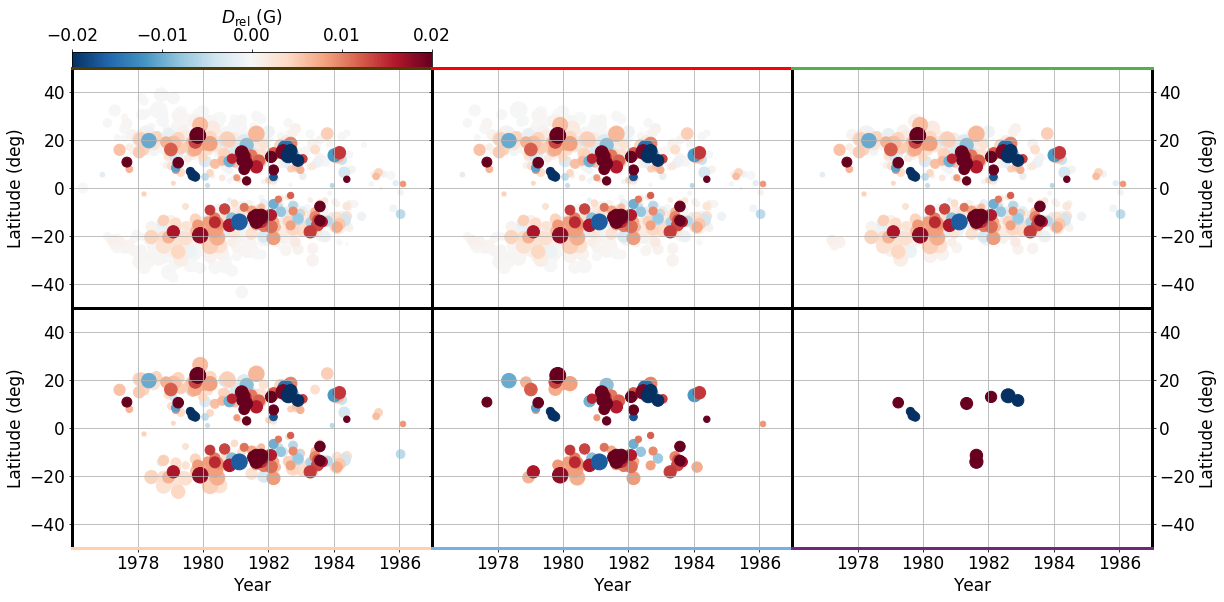

In [6]:
dpi = 300
pxx = 1500  # Horizontal size of each panel
pxy = 1000    # Vertical size of each panel

nph = 2      # Number of horizontal panels
npv = 3      # Number of vertical panels

# Padding
padv  = 200 #Vertical padding in pixels at the edge of figure
padv2 = 0 #Vertical padding in pixels between panels
padh  = 450 #Horizontal padding in pixels at the edge of the figure
padh2 = 0 #Horizontal padding in pixels between panels

# Figure sizes in pixels
fszv = (npv*pxy + 2*padv + (npv-1)*padv2 )      #Vertical size of figure in inches
fszh = (nph*pxx + 2*padh + (nph-1)*padh2 )      #Horizontal size of figure in inches

# Conversion to relative units
ppadv  = padv/fszv     #Vertical padding in relative units
ppadv2 = padv2/fszv    #Vertical padding in relative units
ppadh  = padh/fszv     #Horizontal padding the edge of the figure in relative units
ppadh2 = padh2/fszv    #Horizontal padding between panels in relative units

## Start Figure
fig = plt.figure(figsize=(fszh/dpi,fszv/dpi))


yearticks = np.arange(1978,1988,2)
radmticks = np.arange(-0.02,0.03,0.01)


#Size Factor
szf = 400


# Add colorbar axes
cbaxes1 = fig.add_axes([ppadh, ppadv+pxy/fszv, pxx/fszh, ppadv/3])

# Panel 1
ax1 = fig.add_axes([ppadh, ppadv, pxx/fszh, pxy/fszv])
im1 = plt.scatter((b[3]*27.27+121)/365.25+1976,b[2],100*np.sqrt(abs(b[0])),b[4],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
ax1.set_xlabel('Year')
ax1.set_xlim(1976,1987)
ax1.set_ylabel('Latitude (deg)')
ax1.tick_params(labelbottom='off')
ax1.grid()

# Panel 2
ax2 = fig.add_axes([ppadh+pxx/fszh, ppadv, pxx/fszh, pxy/fszv], sharey=ax1)
im2 = plt.scatter((b[3][strong2]*27.27+121)/365.25+1976,b[2][strong2],100*np.sqrt(abs(b[0][strong2])),b[4][strong2],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
ax2.set_xlim(1976,1998)
ax2.set_ylim(-50,50)
ax2.grid()
ax2.tick_params(labelleft='off')
ax2.tick_params(labelbottom='off')


# Panel 3
ax3 = fig.add_axes([ppadh+pxx/fszh*2, ppadv, pxx/fszh, pxy/fszv], sharey=ax1)
im3 = plt.scatter((b[3][strong3]*27.27+121)/365.25+1976,b[2][strong3],100*np.sqrt(abs(b[0][strong3])),b[4][strong3],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
ax3.grid()
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position('right')
ax3.set_ylabel('Latitude (deg)')
ax3.tick_params(labelbottom='off')


ax1.set_ylim(-50,50)


# Panel 4
ax4 = fig.add_axes([ppadh, ppadv-pxy/fszv, pxx/fszh, pxy/fszv], sharex=ax1)
im4 = plt.scatter((b[3][strong4]*27.27+121)/365.25+1976,b[2][strong4],100*np.sqrt(abs(b[0][strong4])),b[4][strong4],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
ax4.set_xlabel('Year')
ax4.set_xlim(1976,1987)
ax4.set_ylabel('Latitude (deg)')
ax4.grid()
ax4.set_xticks(yearticks)

# Panel 5
ax5 = fig.add_axes([ppadh+pxx/fszh, ppadv-pxy/fszv, pxx/fszh, pxy/fszv], sharey=ax4, sharex=ax2)
im5 = plt.scatter((b[3][strong5]*27.27+121)/365.25+1976,b[2][strong5],100*np.sqrt(abs(b[0][strong5])),b[4][strong5],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
ax5.set_xlabel('Year')
ax5.set_xlim(1976,1987)
ax5.grid()
ax5.tick_params(labelleft='off') 
ax5.set_xticks(yearticks)

# Panel 6
ax6 = fig.add_axes([ppadh+pxx/fszh*2, ppadv-pxy/fszv, pxx/fszh, pxy/fszv], sharey=ax4, sharex=ax3)
im6 = plt.scatter((b[3][strong6]*27.27+121)/365.25+1976,b[2][strong6],100*np.sqrt(abs(b[0][strong6])),b[4][strong6],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
ax6.set_xlabel('Year')
ax6.set_xlim(1976,1987)
ax6.grid()
ax6.yaxis.tick_right()
ax6.yaxis.set_label_position('right')
ax6.set_ylabel('Latitude (deg)')
ax6.set_xticks(yearticks)



ax4.set_ylim(-50,50)




# Adding Flux Colorbar

cb1 = fig.colorbar(im1,cax=cbaxes1, orientation='horizontal')
cb1.set_label('$D_{\mathrm{rel}}$ (G)')
cb1.set_ticks(radmticks)
cbaxes1.xaxis.tick_top()
cbaxes1.xaxis.set_label_position('top')




# Making Spines Bolder

ax1.spines['bottom'].set_linewidth(3) 
ax1.spines['top'].set_linewidth(3)  
ax1.spines['right'].set_linewidth(3) 
ax1.spines['left'].set_linewidth(3)
ax1.spines['top'].set_color(brown)

ax2.spines['bottom'].set_linewidth(3) 
ax2.spines['top'].set_linewidth(3)  
ax2.spines['right'].set_linewidth(3) 
ax2.spines['left'].set_linewidth(3)
ax2.spines['top'].set_color('red')

ax3.spines['bottom'].set_linewidth(3) 
ax3.spines['top'].set_linewidth(3)  
ax3.spines['right'].set_linewidth(3) 
ax3.spines['left'].set_linewidth(3)
ax3.spines['top'].set_color(green)

ax4.spines['bottom'].set_linewidth(3) 
ax4.spines['top'].set_linewidth(3)  
ax4.spines['right'].set_linewidth(3) 
ax4.spines['left'].set_linewidth(3)
ax4.spines['bottom'].set_color(peach)

ax5.spines['bottom'].set_linewidth(3) 
ax5.spines['top'].set_linewidth(3)  
ax5.spines['right'].set_linewidth(3) 
ax5.spines['left'].set_linewidth(3)
ax5.spines['bottom'].set_color(blue)

ax6.spines['bottom'].set_linewidth(3) 
ax6.spines['top'].set_linewidth(3)  
ax6.spines['right'].set_linewidth(3) 
ax6.spines['left'].set_linewidth(3)
ax6.spines['bottom'].set_color(purple)


#plt.savefig('/home/grads/xsxs53/Documents/phd/Papers/regions_axd/c21_6panel.eps', format='eps', dpi=300,bbox_inches='tight')
